In [27]:
from plot_util import *
import matplotlib.pyplot as plt
import os

In [28]:
main_dir = "/home/robin/EULER/distributed-inexact-policy-iteration/output/MDP/SolverType_Size/24971448"
#main_dir = "/home/robin/EULER/distributed-inexact-policy-iteration/output/MDP/SolverType_Size/24983216"


In [29]:
runtimes = extract_runtimes_MDP(main_dir)

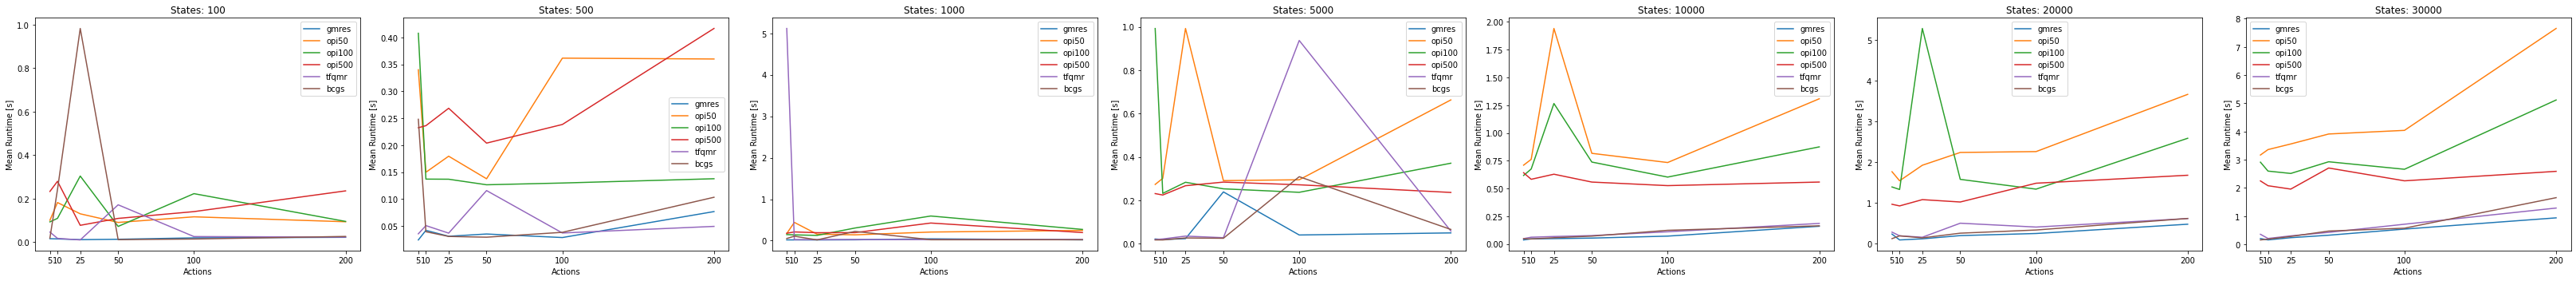

In [30]:
#runtimes = extract_runtimes_MDP(main_dir)

unique_states = sorted(list({s for method_data in runtimes.values() for s in method_data.keys()}))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Create a row of subplots with 1 row and len(unique_states) columns
fig, axes = plt.subplots(nrows=1, ncols=len(unique_states), figsize=(45, 5))

for i, state in enumerate(unique_states):
    ax = axes[i]
    
    for k, (method, method_data) in enumerate(runtimes.items()):
        if state in method_data:
            actions = sorted(method_data[state].keys())
            mean_runtimes = [method_data[state][action]['mean'] for action in actions]
            
            ax.plot(actions, mean_runtimes, color=colors[k % len(colors)], label=method)
            
    ax.set_title(f'States: {state}')
    ax.set_xlabel('Actions')
    ax.set_xticks(actions)
    ax.set_ylabel('Mean Runtime [s]')
    ax.legend()

# Adjust layout
plt.tight_layout()
#plt.savefig(f"{main_dir}/SolverType_Size_{os.path.basename(main_dir)}.pdf", dpi=300)
plt.savefig("MDP_test_actions.pdf", dpi=300)
plt.show()

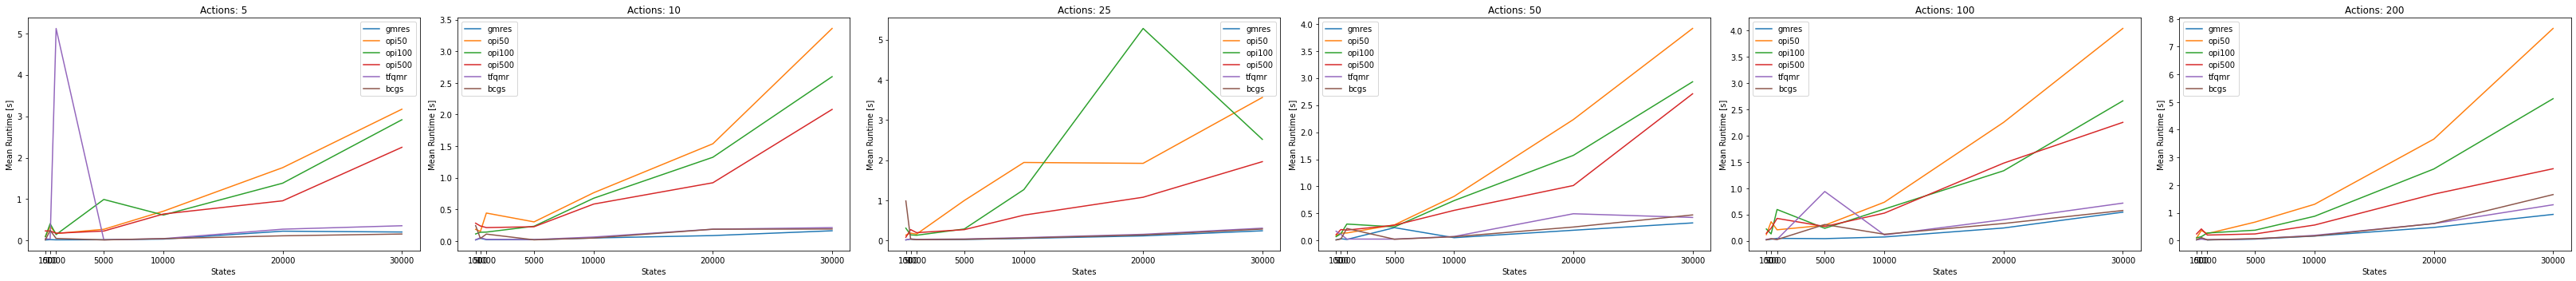

In [31]:
unique_actions = sorted(list({a for method_data in runtimes.values() for state_data in method_data.values() for a in state_data.keys()}))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Create a row of subplots with 1 row and len(unique_actions) columns
fig, axes = plt.subplots(nrows=1, ncols=len(unique_actions), figsize=(45, 5))

for i, action in enumerate(unique_actions):
    ax = axes[i]
    
    for k, (method, method_data) in enumerate(runtimes.items()):
        states = sorted([state for state in method_data if action in method_data[state]])
        mean_runtimes = [method_data[state][action]['mean'] for state in states]
        
        ax.plot(states, mean_runtimes, color=colors[k % len(colors)], label=method)
        
    ax.set_title(f'Actions: {action}')
    ax.set_xlabel('States')
    ax.set_xticks(states)
    ax.set_ylabel('Mean Runtime [s]')
    ax.legend()

# Adjust layout
plt.tight_layout()
#plt.savefig(f"{main_dir}/SolverType_Size_{os.path.basename(main_dir)}.pdf", dpi=300)
plt.savefig("MDP_test_states.pdf", dpi=300)
plt.show()